# NLTK 1: Interactive exploration of  corpora
Learning goals:
 - Understand how useful raw text corpora can be
 - Understand what we can understand about language by quantitative and distributional corpus linguistic applications
 - Know how list comprehension helps to quickly do interactive exploration of corpora

## Loading the NLTK Interactive Demo
Note: This code is really meant for interactive exploration and prints out results more than returning values to compute with.

In [1]:
from nltk.book import *
texts()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Texts are sequences of tokens

In [2]:
text1[0:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

## Create concordances
KWIC (Keyword in Context)

In [3]:
text1.concordance("man", lines=10, width=68)
print()
text2.concordance("man",lines=10, width=68)

Displaying 10 of 527 matches:
as ) which is but an artificial man ." -- OPENING SENTENCE OF HOBBE
hat sort that was killed by any man , such is his fierceness and sw
 deepest reveries -- stand that man on his legs , set his feet a - 
he urbane activity with which a man receives money is really marvel
that on no account can a monied man enter heaven . Ah ! how cheerfu
uly , enough to drive a nervous man distracted . Yet was there a so
dle sojourning in the body of a man , travelled full forty feet , a
, bustles a little withered old man , who , for their money , dearl
 up with the half of any decent man ' s blanket . " I thought so . 
s much noise as the rest . This man interested me at once ; and sin

Displaying 10 of 121 matches:
ner of this estate was a single man , who lived to a very advanced 
on , a steady respectable young man , was amply provided for by the
was not an ill - disposed young man , unless to be rather cold hear
ist between the children of any man by different marria

In [4]:
text1.concordance("woman", lines=10, width=68)
print()
text2.concordance("woman",lines=10, width=68)

Displaying 10 of 10 matches:
 that , like the dyspeptic old woman , he must have " broken his di
ons by the sight of a freckled woman with yellow hair and a yellow 
rheumatic back . Never did any woman better deserve her name , whic
bs . Nor can any son of mortal woman , for the first time , seat hi
 Har -- yes , Mr . Harry --( a woman ' s pinny hand ,-- the man ' s
s same last or shoe , that old woman of the nursery tale , with the
ng at the end . It ' s the old woman ' s tricks to be giving cobbli
ve for tinkers . I know an old woman of sixty - five who ran away w
arently pure and soft , with a woman ' s look , and the robust and 
ck die , if die he must , in a woman ' s fainting fit . Up helm , I

Displaying 10 of 68 matches:
 Had he married a more amiable woman , he might have been made stil
so much the greater , and to a woman in Mrs . Dashwood ' s situatio
fortable fortune for any young woman ." " To be sure it is ; and , 
 if he were to wish to marry a woman who had not either a

## Word frequencies in a corpus
Let's compute relative frequencies...

In [5]:
text1.count('love')/len(text1)

9.201783612390202e-05

In [6]:
text2.count('love')/len(text2)

0.0005438774933604566

Ok, these numbers urgently need some formatting. Let's use format strings from Python

In [7]:
print(f"Text1: {text1.count('love')/len(text1):.4%}\nText2: {text2.count('love')/len(text2):.4%}")

Text1: 0.0092%
Text2: 0.0544%


## Frequency distributions
Calculate the frequency of all different tokens (=Types) in a text. 
Should follow the [Zipfian Law](https://en.wikipedia.org/wiki/Zipf%27s_law) for larger text corpora

In [8]:
fdist = FreqDist(text1)
vocabulary= sorted(fdist, key=fdist.get, reverse=True)
for w in vocabulary[:20]:
    print(w, "\t\t", fdist[w])

, 		 18713
the 		 13721
. 		 6862
of 		 6536
and 		 6024
a 		 4569
to 		 4542
; 		 4072
in 		 3916
that 		 2982
' 		 2684
- 		 2552
his 		 2459
it 		 2209
I 		 2124
s 		 1739
is 		 1695
he 		 1661
with 		 1659
was 		 1632



<h3>Printing a plot</h3>
Make sure that the plot object is rendered by Jupyter

In [ ]:
! pip install matplotlib

In [ ]:
%matplotlib inline
fdist.plot(20,cumulative=True)

## Similarity
Distributional similarity 
- "You shall know a word by the company it keeps!" (J. R. Firth, 1957)
- "words that occur in the same contexts tend to have similar meanings" (Pantel, 2005)

Which words do appear in similar contexts?

In [9]:
text1.similar("woman")
print()
text2.similar("woman")

man king hand whale devil as bird mast job lord day serpent boat stone
ship harris captain mariner fellow hands

man way year moment word men letter friend person gentleman living
situation part lady wife child time thing little day


In [ ]:
text1.similar("love")
print()
text2.similar("love")

## Statistical collocations
Which words occur unexpectedly often next to each other?
 - Simple **expected frequency** of word grammars: Each word lies in an urn as often as it occurs in the corpus. Randomly draw two words one after the other from the urn.
 - Empirical frequency** of word bigrams: Create the probability distribution of all word bigrams effectively occurring in the corpus.
 - If expected frequency deviates strongly from empirical frequency, a [statistical collocation] (https://en.wikipedia.org/wiki/Collocation) is available.
 
collocation method is currently buggy, use collocation_list()

In [10]:
print(text1.collocation_list())
print()
print(text2.collocation_list())

[('Sperm', 'Whale'), ('Moby', 'Dick'), ('White', 'Whale'), ('old', 'man'), ('Captain', 'Ahab'), ('sperm', 'whale'), ('Right', 'Whale'), ('Captain', 'Peleg'), ('New', 'Bedford'), ('Cape', 'Horn'), ('cried', 'Ahab'), ('years', 'ago'), ('lower', 'jaw'), ('never', 'mind'), ('Father', 'Mapple'), ('cried', 'Stubb'), ('chief', 'mate'), ('white', 'whale'), ('ivory', 'leg'), ('one', 'hand')]

[('Colonel', 'Brandon'), ('Sir', 'John'), ('Lady', 'Middleton'), ('Miss', 'Dashwood'), ('every', 'thing'), ('thousand', 'pounds'), ('dare', 'say'), ('Miss', 'Steeles'), ('said', 'Elinor'), ('Miss', 'Steele'), ('every', 'body'), ('John', 'Dashwood'), ('great', 'deal'), ('Harley', 'Street'), ('Berkeley', 'Street'), ('Miss', 'Dashwoods'), ('young', 'man'), ('Combe', 'Magna'), ('every', 'day'), ('next', 'morning')]


## Dispersion plots
Where do words appear how often on a timeline? U.S. Inaugural Addresses
 - Timeline is implicit in the chronological order of the speeches.

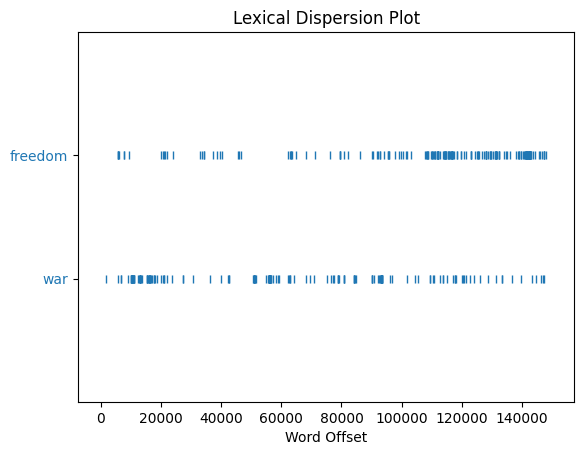

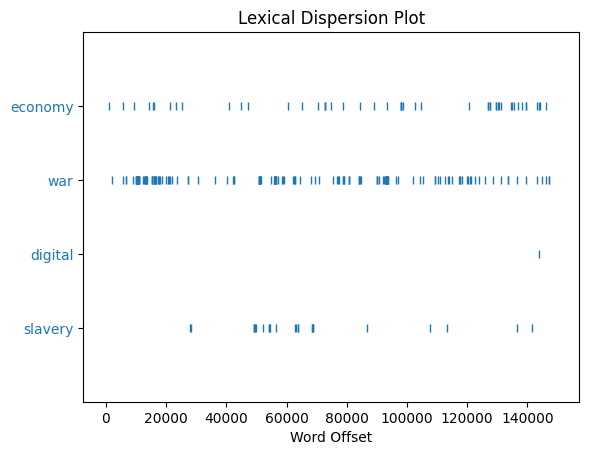

In [11]:
text4.dispersion_plot(["freedom","war"])
text4.dispersion_plot(["economy","war","digital","slavery"])

## Text generation
Do you have to make a political speech? Let yourself be inspired by the presidential speeches of the past presidents of the USA. 
 - Statistical generation of texts e.g. from trigram statistics of words. Typical word combinations from a corpus are used to build a probability distribution for the next word to generate. 


In [12]:
t = text4.generate(text_seed="Freedom".split(),length=40)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/siclemat/nltk_data'
    - '/Users/siclemat/lehre/hs22/pcl1/introduction-to-cl-uzh/venv/nltk_data'
    - '/Users/siclemat/lehre/hs22/pcl1/introduction-to-cl-uzh/venv/share/nltk_data'
    - '/Users/siclemat/lehre/hs22/pcl1/introduction-to-cl-uzh/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Sophisticated text generation using recursive neural networks, which can take a little more of the already expressed material into account when proposing the next word: https://cyborg.tenso.rs
 - Recommended: Language model of (re-)tweets by/with Donald Trump (e.g. start with "America")
 - Start with "I love" and select different training corpora (e.g. Linux:-)

Transformer-based text generation, which is the current state-of-the-art method:
 - Write your next ACL paper with it: [This paper describes](https://transformer.huggingface.co/doc/arxiv-nlp/BcKBkznNiWnDfJdynrvMxQkF/edit)
